# 크롤링 함수
--- 

In [1]:
# #1. wordcloud 설치
# !pip install wordcloud

# #2. jpype1 설치 
# !pip install jpype1

# #3. konlpy 설치
#!pip install konlpy

In [2]:
#!pip install webdriver-manager

In [2]:
# 블로그 검색 함수
def	blog_search(keyword):
    # 모듈설치
    import selenium
    from selenium.webdriver.chrome.service import Service
    from webdriver_manager.chrome import ChromeDriverManager
    from	bs4	import	BeautifulSoup
    import	requests
    from	itertools import count
    from	selenium import	webdriver
    from	konlpy.tag import Okt
    from	collections import Counter
    from	wordcloud import WordCloud
    import	matplotlib.pyplot as plt
    import matplotlib.font_manager as fm
    from urllib.request import urlopen
    import platform
    import pandas as pd
    import re
    okt = Okt()
    
    blog_title_text=[]
    noun_list =[]
    counts =[]
    tag =[]
    
    for i in range(1,10):
        wd	= webdriver.Chrome(service=Service(ChromeDriverManager().install()))
        main_url =f"https://section.blog.naver.com/Search/Post.naver?pageNo={i}&rangeType=ALL&orderBy=sim&keyword={keyword}" 

        wd.get(main_url)	
        
        html	=	wd.page_source
        soupData =	BeautifulSoup(html,	'html.parser')
        blog_title =	soupData.find_all('span',	{'class':'title'})
        
        for i in range(7):
            blog_title_text.append(blog_title[i].text)
        
        for data in blog_title_text:
            sentences_tag = okt.pos(data)
            # tag가 명사인 단어들만 noun_adj_list에 넣어준다.
            for word, tag in sentences_tag:
                if tag in ['Noun']:
                    if keyword in word:
                        continue
                    elif '여행' in word:
                        continue
                    else:
                        noun_list.append(word)
        wd.quit()
        
    counts	= Counter(noun_list)
    tags	= counts.most_common(50)
    
    if	platform.system()	==	'Windows':
        path	=	r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system()	==	'Darwin':		#	Mac	OS
        path	=	r'/System/Library/Fonts/AppleGothic'
    else:
        path	=	r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

    wc = WordCloud(font_path=path,	background_color='white',	width=800,	height=600, random_state = 30)
    print(dict(tags))
    cloud =	wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(12,	8))
    #plt.text(x=800, y = 300 ,s= f'<-{keyword}', color = 'black', fontsize = 30)
    #plt.title(f'[{keyword}]', size=40)
    plt.axis('off')
    plt.imshow(cloud)
    plt.show() 
    # return(tags)    

[WDM] - Downloading: 100%|██████████| 6.46M/6.46M [00:00<00:00, 12.4MB/s]


{'이륜차': 330, '사고': 185, '교통사고': 111, '오토바이': 74, '보험': 62, '자동차': 36, '보험금': 33, '안전': 30, '보상': 27, '사례': 26, '증가': 24, '운전자': 24, '비율': 24, '도로': 23, '사망': 22, '의무': 22, '기준': 21, '후유': 20, '장해': 20, '예방': 20, '전용': 18, '과실': 17, '시': 16, '관리': 16, '부실': 16, '배달': 16, '위반': 15, '후유증': 15, '운행': 15, '칙': 13, '개선': 13, '책임': 13, '신호': 13, '꼭': 12, '골절': 12, '보장': 12, '상해': 12, '고시': 12, '의류': 12, '교차로': 12, '비': 11, '개인': 11, '신고': 11, '종합': 11, '손해': 10, '면책': 9, '사유': 9, '고지': 9, '통지': 9, '관련': 9}


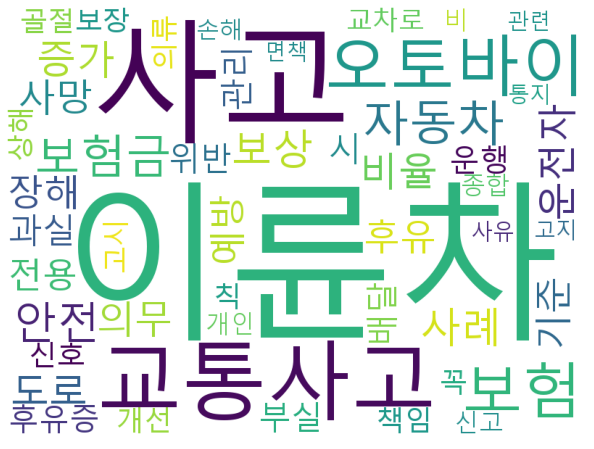

In [4]:
blog_search('이륜차 사고')

{'이륜차': 321, '사고': 151, '교통사고': 117, '오토바이': 62, '보험': 55, '안전': 48, '한의원': 39, '배달': 30, '증가': 30, '교통': 27, '원인': 25, '후유증': 24, '사망': 24, '라이더': 24, '도로': 20, '홍보': 20, '사례': 19, '보상': 19, '보험금': 18, '운행': 17, '자동차': 17, '경찰': 17, '후유': 16, '매년': 16, '골절': 15, '주행': 15, '더': 14, '병원': 14, '사망자': 13, '아산': 13, '경찰서': 13, '예방': 13, '이미지': 13, '위': 13, '단속': 13, '의무': 12, '손해배상': 12, '서울': 12, '자치': 12, '위원회': 12, '감소': 12, '민관': 12, '회의': 12, '과실': 11, '음주운전': 11, '재해': 10, '비율': 10, '인천': 10, '칙': 10, '위례': 9}


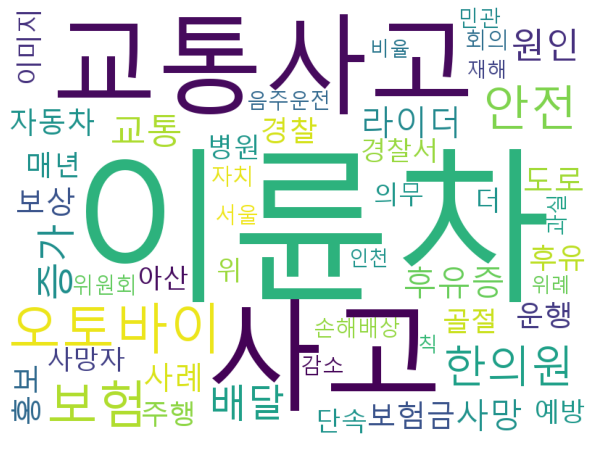

In [5]:
blog_search('이륜차 사고 원인')

[WDM] - Downloading: 100%|██████████| 6.46M/6.46M [00:03<00:00, 1.78MB/s]


{'오토바이': 98, '보험': 86, '검사': 71, '등록': 46, '소음': 45, '배달': 41, '정기': 39, '안전': 35, '운전자': 30, '환경부': 27, '바이크': 25, '등': 23, '및': 22, '소': 21, '전기': 21, '신고': 20, '서류': 19, '자동차': 18, '필수': 17, '발급': 17, '위': 17, '강화': 16, '후기': 15, '구조': 15, '변경': 15, '규제': 15, '단속': 15, '퀵서비스': 14, '레이서': 14, '책임': 13, '준비': 13, '배기': 12, '초과': 12, '가능': 12, '사용': 12, '이후': 12, '꼭': 12, '교통': 12, '계약': 12, '의무': 12, '안개': 12, '라이더': 12, '환경': 11, '라면': 11, '교통사고': 11, '음원': 11, '지정': 11, '칙': 11, '완료': 10, '번호판': 10}


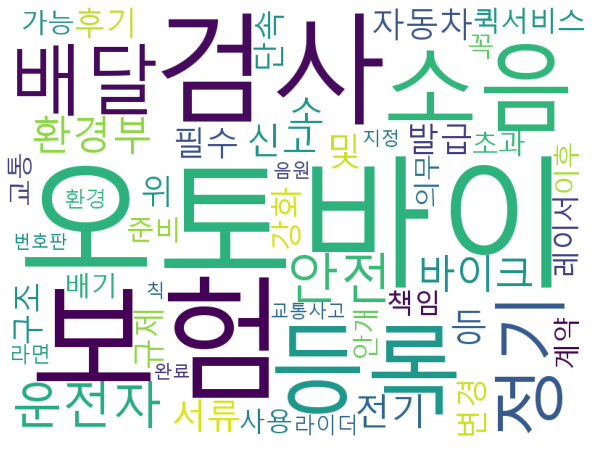

In [3]:
blog_search('이륜차')

{'비아': 81, '지오': 81, '추천': 53, '및': 50, '후기': 46, '자전거': 46, '접이식': 37, '출퇴근': 34, '바이크': 30, '모드': 24, '타고': 23, '수월봉': 20, '제주': 20, '알톤': 19, '코디악': 18, '몬스터': 18, '장단점': 18, '운동': 17, '트레일': 16, '바퀴': 16, '볼트': 16, '라이딩': 16, '지질': 15, '커넥티드': 15, '렌탈': 15, '속도': 15, '제주도': 14, '랑케': 14, '레이': 14, '시': 14, '용': 13, '주행': 13, '수리': 12, '인치': 12, '전기': 12, '수원': 12, '셀링': 12, '가성': 12, '비': 12, '포인트': 11, '모토': 11, '벨': 11, '자토': 10, '바이': 10, '로': 9, '삶': 9, '질': 9, '이용': 9, '펑크': 9, '셀프': 9}


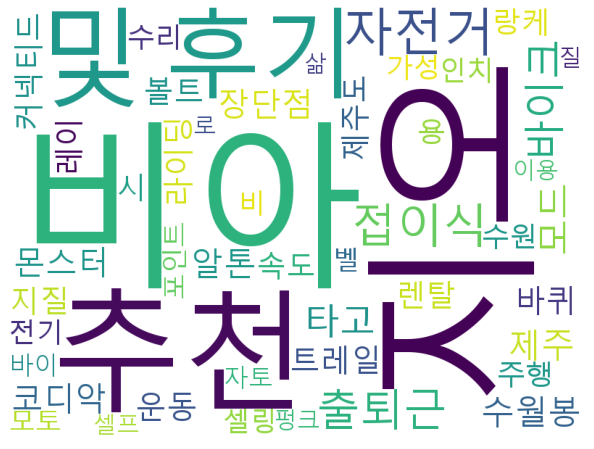

In [4]:
blog_search('전기자전거')

{'킥': 393, '보드': 390, '아이': 74, '마이크로': 74, '유아': 60, '어린이': 43, '전동': 42, '미니': 39, '추천': 30, '헬멧': 28, '구입': 27, '키즈': 24, '살': 23, '자전거': 22, '두발': 19, '선물': 19, '아기': 19, '초등학생': 18, '접이식': 18, '매직': 18, '선글라스': 18, '이용': 17, '카페': 17, '안내': 17, '스쿠터': 17, '안전': 16, '개월': 16, '투고': 15, '스피드': 15, '타고': 14, '야외': 14, '기술': 14, '아들': 14, '보호': 13, '후기': 13, '붕붕': 13, '탈': 12, '수': 12, '겨울': 12, '정보': 12, '우리': 12, '첫': 12, '보호대': 12, '스타': 11, '너': 11, '초등': 11, '및': 11, '여': 11, '용인': 10, '루트': 10}


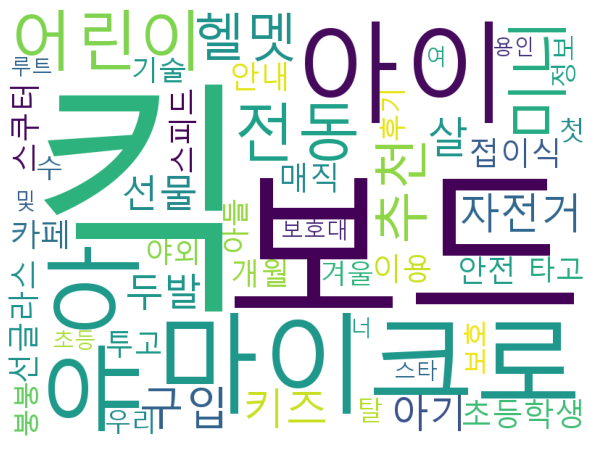

In [5]:
blog_search('킥보드')

{'하수': 88, '커피': 78, '당산': 67, '카페': 61, '구': 58, '수구': 57, '역류': 57, '세척': 52, '고압': 50, '배관': 50, '청소': 46, '공사': 33, '설치': 32, '분위기': 30, '정화조': 29, '업체': 27, '그것': 24, '알고싶다': 24, '해결': 24, '영등포': 23, '침수': 22, '서울': 21, '및': 19, '뚜껑': 18, '도로': 18, '알': 17, '시흥': 17, '외부': 16, '죽음': 15, '구멍': 15, '강남': 15, '사태': 15, '싱크대': 14, '공장': 12, '수리': 12, '위': 12, '마무리': 12, '누수': 12, '빗물': 11, '아파트': 11, '관로': 11, '탐지': 11, '내시경': 10, '검사': 10, '작업': 10, '배수': 10, '무엇': 9, '인천': 9, '준설': 9, '집': 9}


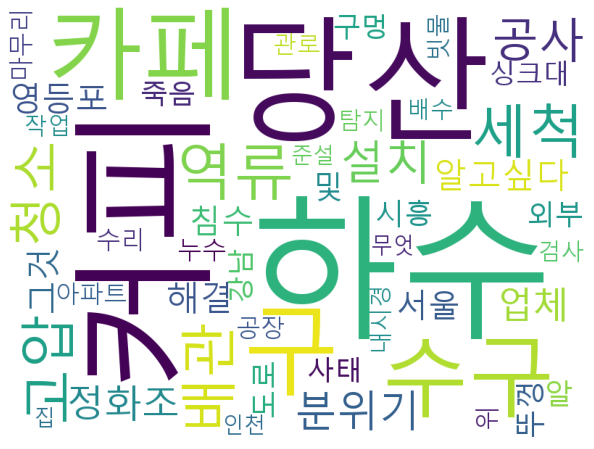

In [6]:
blog_search('맨홀')

In [7]:
blog_search('포트홀')

TimeoutException: Message: timeout: Timed out receiving message from renderer: 299.819
  (Session info: chrome=107.0.5304.88)
Stacktrace:
Backtrace:
	Ordinal0 [0x0089ACD3+2075859]
	Ordinal0 [0x0082EE61+1633889]
	Ordinal0 [0x0072B7BD+571325]
	Ordinal0 [0x0071E410+517136]
	Ordinal0 [0x0071E231+516657]
	Ordinal0 [0x0071D0A3+512163]
	Ordinal0 [0x0071D6D8+513752]
	Ordinal0 [0x00726662+550498]
	Ordinal0 [0x00731BD5+596949]
	Ordinal0 [0x00734FC0+610240]
	Ordinal0 [0x0071DA81+514689]
	Ordinal0 [0x00731A0F+596495]
	Ordinal0 [0x0078B93B+964923]
	Ordinal0 [0x00777136+880950]
	Ordinal0 [0x0074FEFD+720637]
	Ordinal0 [0x00750F3F+724799]
	GetHandleVerifier [0x00B4EED2+2769538]
	GetHandleVerifier [0x00B40D95+2711877]
	GetHandleVerifier [0x0092A03A+521194]
	GetHandleVerifier [0x00928DA0+516432]
	Ordinal0 [0x0083682C+1665068]
	Ordinal0 [0x0083B128+1683752]
	Ordinal0 [0x0083B215+1683989]
	Ordinal0 [0x00846484+1729668]
	BaseThreadInitThunk [0x752DFA29+25]
	RtlGetAppContainerNamedObjectPath [0x772B7B5E+286]
	RtlGetAppContainerNamedObjectPath [0x772B7B2E+238]
